# **Sequential API**

## Linear Model

[ (I/P)⤍ (Linear Sequence) ⤍ (O/P) ]

## Functional Model

[ (I/P)⤍ (Linear Sequence) ⤍ (O/P1), (O/P12), (O/P3) ]


**Example**

Suppose we have product **(X)** :

1. Metadata
2. Description
3. Images

**Linear Model**

3 Networks/Models

**Functional Model**

Concatination of all Models into 1 Network

## Code

In [2]:
from keras.models import Model
from keras.layers import *

In [12]:
input_shape = (3,)
X = Input(shape=input_shape)

In [13]:
hidden1 = Dense(128, activation='relu')(X)

hidden2 = Dense(64, activation='relu')(hidden1)


output1 = Dense(1,activation='linear')(hidden1)

output2 = Dense(1,activation='sigmoid')(hidden2)

In [14]:
model = Model(inputs=X,outputs=[output1,output2])

In [15]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 3)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │            512 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 64)             │          8,256 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │            129 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 1)              │             65 │ dense_4[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,962 (35.01 KB)

 Trainable params: 8,962 (35.01 KB)

 Non-trainable params: 0 (0.00 B)

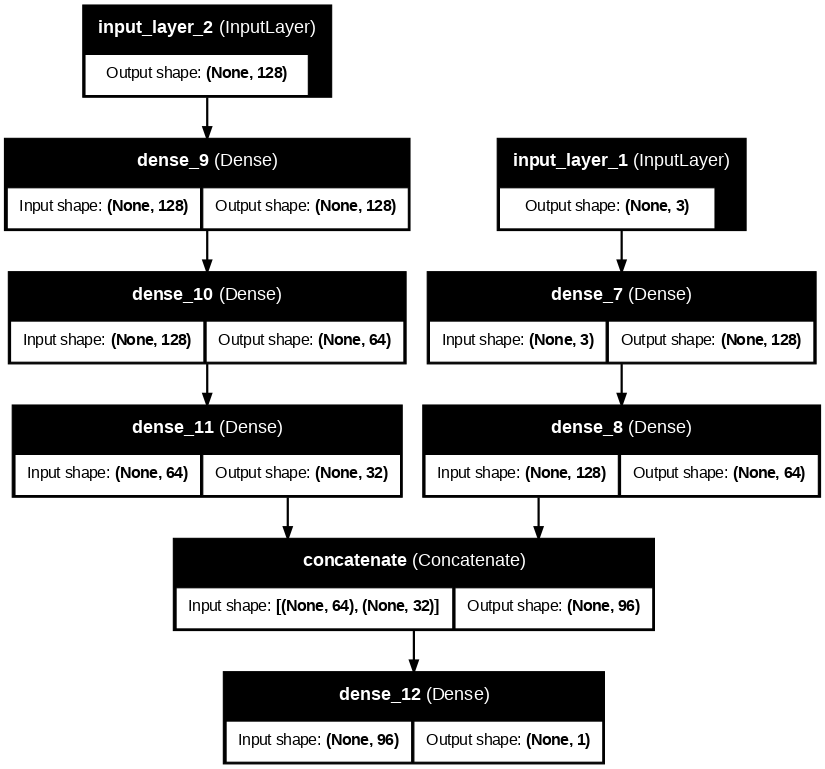

In [35]:
from keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True,dpi=80)

Example 2

In [19]:
Input1 = Input(shape=(3,))
Input2 = Input(shape=(128,))

In [20]:
X = Dense(128,activation='relu')(Input1)
X1 = Dense(64,activation='relu')(X)

In [21]:
Y = Dense(128,activation='relu')(Input2)
Y1 = Dense(64,activation='relu')(Y)
Y2 = Dense(32,activation='relu')(Y1)

In [22]:
Combined_model = Concatenate()([X1,Y2])

In [23]:
Combined_model

<KerasTensor shape=(None, 96), dtype=float32, sparse=False, name=keras_tensor_12>

In [27]:
op = Dense(1,activation='sigmoid')(Combined_model)

In [28]:
model = Model(inputs=[Input1,Input2],outputs=op)

In [29]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 128)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 3)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 128)            │         16,512 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 128)            │            512 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 64)             │          8,256 │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 64)             │          8,256 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 32)             │          2,080 │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 96)             │              0 │ dense_8[0][0],         │
│                           │                        │                │ dense_11[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 1)              │             97 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 35,713 (139.50 KB)

 Trainable params: 35,713 (139.50 KB)

 Non-trainable params: 0 (0.00 B)

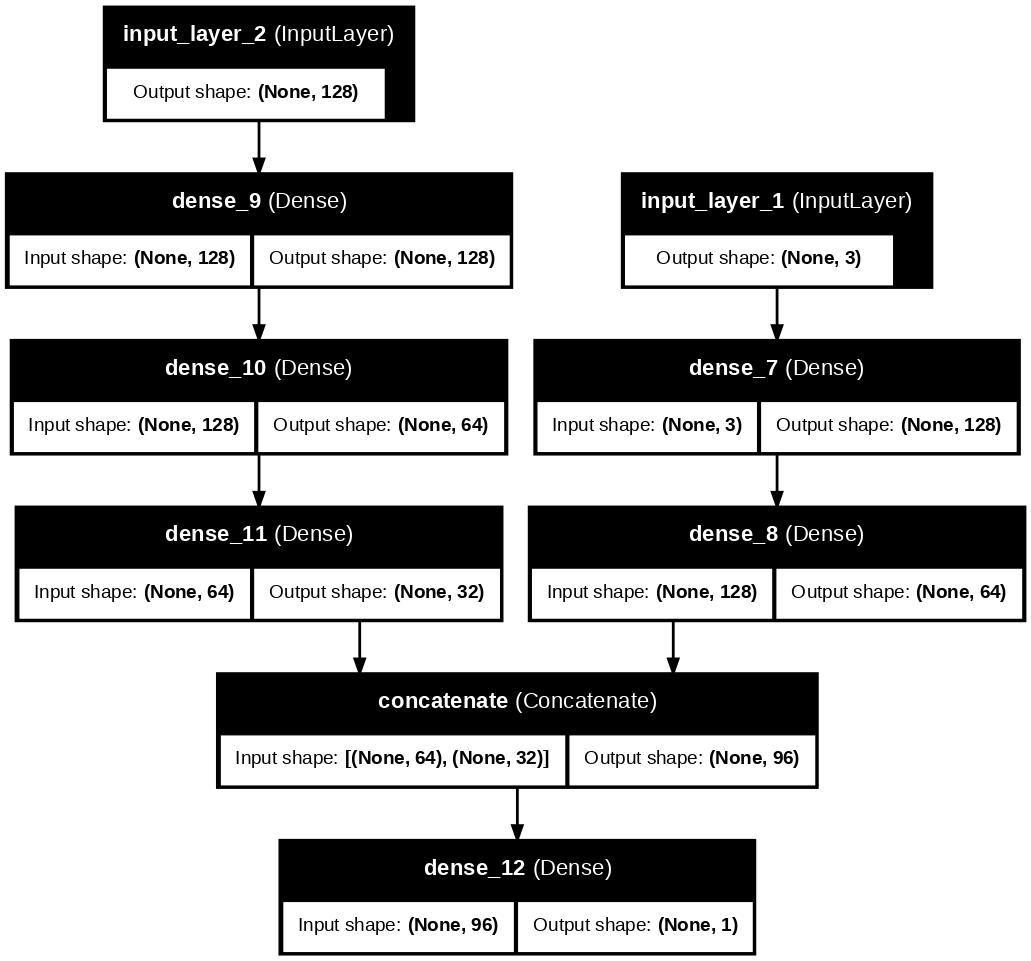

In [33]:
from collections.abc import Sized
plot_model(model,show_shapes=True,show_layer_names=True, dpi=100)